In [8]:
import os
import random
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

Data preprocessing

In [9]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array



In [10]:
IMAGE_SIZE = (60, 80)  # Adjusted image size
BATCH_SIZE = 32 # specifies the number of images included in each batch during training. A batch is a set of images that are processed together in parallel during each training iteration. A larger batch size can lead to faster training times but may require more memory.
NUM_CLASSES = 3  # Adjust this according to the number of classes in your dataset
EPOCHS = 10 # This parameter determines the number of times the entire dataset is passed forward and backward through the neural network during training. Each pass through the dataset is called an epoch. Training for more epochs allows the model to potentially learn more from the data but may also increase the risk of overfitting.

# Define data directories
train_dir = 'dataset/train'
validation_dir = 'dataset/validation'
test_dir = 'dataset/test'

#This class in Keras provides a flexible way to preprocess images and augment the training data.
# In this case, rescale=1./255 is used to rescale the pixel values of the images to the range [0, 1]. 
# This rescaling is a common practice to ensure numerical stability during training.
train_datagen = ImageDataGenerator(rescale=1./255)
# generates batches of data from image files in a directory.
train_generator = train_datagen.flow_from_directory(
    train_dir,# The train_dir parameter specifies the directory containing the training images.
    target_size=IMAGE_SIZE,# target_size specifies the dimensions to which all images will be resized.
    batch_size=BATCH_SIZE,# batch_size determines the number of images in each batch.
    class_mode='categorical'# class_mode specifies the type of label arrays that are returned by the generator. Setting it to 'categorical' indicates that the labels will be one-hot encoded.
)

validation_datagen = ImageDataGenerator(rescale=1./255) 
validation_generator = validation_datagen.flow_from_directory(

    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
print("Classes found in training directory:", train_generator.class_indices)
print("Classes found in validation directory:", validation_generator.class_indices)
print("Classes found in test directory:", test_generator.class_indices)



Found 2278 images belonging to 3 classes.
Found 487 images belonging to 3 classes.
Found 491 images belonging to 3 classes.
Classes found in training directory: {'accessories': 0, 'fashion': 1, 'makeup': 2}
Classes found in validation directory: {'accessories': 0, 'fashion': 1, 'makeup': 2}
Classes found in test directory: {'accessories': 0, 'fashion': 1, 'makeup': 2}


Buidling the model

In [11]:
# Define the CNN architecture
model = Sequential([
    # ReLU is computationally efficient and avoids the saturation problem that can occur with sigmoid and tanh functions.
    # The first parameter 32 denotes the number of filters, and (3, 3) specifies the size of each filter.
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])
# Compile the model

#compiling the model using the Adam optimizer, categorical cross-entropy loss function, and accuracy metric.
model.compile(optimizer='adam',# updates the network weights based on training data
              loss='categorical_crossentropy',# It measures the difference between the true distribution of the data and the predicted distribution produced by the model. The goal is to minimize this difference during training
              metrics=['accuracy']# monitoring the accuracy metric during training, which tells us the proportion of correctly classified images out of the total number of images.
              )

fine-tune the pretrained model on our specific dataset.

In [23]:
history = model.fit(
    train_generator,# the generator object that yields batches of training data.
    steps_per_epoch=train_generator.samples // BATCH_SIZE,# This parameter specifies the number of steps (mini-batches) to be processed from the generator before declaring one epoch finishedIt's typically set to the total number of training samples divided by the batch size.
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)



Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9871 - loss: 0.0388 - val_accuracy: 0.9312 - val_loss: 0.4171
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0213
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9955 - loss: 0.0173 - val_accuracy: 0.9354 - val_loss: 0.3298
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.9688 - loss: 0.0254 - val_accuracy: 1.0000 - val_loss: 1.4236e-04
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9969 - loss: 0.0149 - val_accuracy: 0.9312 - val_loss: 0.3802
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 1.0000 - loss: 5.1846e-04 - val_accuracy: 0.8571 - val_loss: 0.2513
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9866 - loss: 0.0316 - val_accuracy: 0.9187 - val_loss: 0.4713
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.9688 - loss: 0.0630 - val_accuracy

Testing the model

In [24]:

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f'Test accuracy: {test_accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9286 - loss: 0.5442
Test accuracy: 0.9208333492279053


Visualize some randomly selected images 

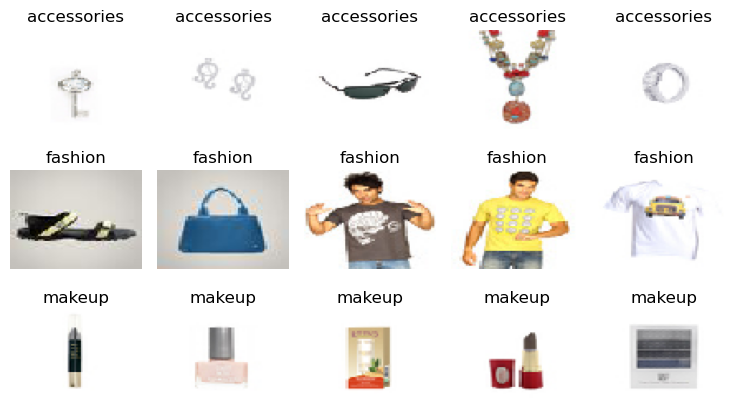

In [115]:
import random

# Define a function to visualize randomly selected images from the test set
def visualize_random_images(generator, class_names, num_images=5, image_size=(4, 4)):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)
    
    # Reverse the class indices to map integer labels to class names
    class_indices = generator.class_indices
    label_to_class = {v: k for k, v in class_indices.items()}
    
    # Initialize figure
    fig, axes = plt.subplots(len(class_names), num_images, figsize=(num_images * image_size[0], len(class_names) * image_size[1]))
    
    # Iterate over each class
    for i, class_name in enumerate(class_names):
        class_images = images[np.argmax(labels, axis=1) == class_indices[class_name]]
        
        # Randomly select images from the current class
        selected_images = random.sample(list(class_images), min(num_images, len(class_images)))
        
        # Plot randomly selected images from the current class
        for j, image in enumerate(selected_images):
            axes[i, j].imshow(image)
            axes[i, j].axis('off')
            axes[i, j].set_title(class_name)
            axes[i, j].set_aspect('equal')  # Set aspect ratio to equal for better visualization
    
    plt.tight_layout()
    plt.savefig('results/test_1.jpg')
    plt.show()

# Visualize randomly selected images from each class in the test set
visualize_random_images(test_generator, ['accessories', 'fashion', 'makeup'], num_images=5, image_size=(1.5, 1.5))


Random images from the shop

In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [113]:
def visualize_random_images_array(images, predicted_classes, image_size=(2, 2)):
    # Calculate the number of images
    num_images = len(images)

    # Set up the figure
    plt.figure(figsize=(image_size[0] * num_images, image_size[1]))
    
    # Iterate over each image and its predicted class
    for i, (image, predicted_class) in enumerate(zip(images, predicted_classes)):
        # Display the image
        plt.subplot(1, num_images, i + 1)
  
        plt.imshow(image)
        plt.axis('off')
        plt.title(predicted_class)
    plt.savefig('results/test_2.jpg')
    plt.show()
# Visualize randomly selected images from the random images folder with predicted classes


Testing on real world examples

In [94]:

# Define the directory containing the random images
random_images_dir = 'randomimages'

# Create a data generator for the random images
random_images = []
for filename in os.listdir(random_images_dir):
    # Load and resize the image
    img = load_img(os.path.join(random_images_dir, filename), target_size=IMAGE_SIZE)
    img_array = img_to_array(img)
    random_images.append(img_array)

random_images = np.array(random_images)  # Convert to numpy array

# Rescale pixel values
random_images = random_images / 255.0

# Predict the classes of the random images using the trained model
predictions = model.predict(random_images)

# Convert the predictions to class names
predicted_classes = [label_to_class[prediction.argmax()] for prediction in predictions]

# Print the predicted classes for each image
for i, filename in enumerate(os.listdir(random_images_dir)):
    print(f"Image: {filename}, Predicted class: {predicted_classes[i]}")

# Visualize randomly selected images from the random images folder with predicted classes



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: 11.jpg, Predicted class: fashion
Image: 12.jpg, Predicted class: fashion
Image: 2.jpg, Predicted class: makeup
Image: 3.jpg, Predicted class: fashion
Image: 4.jpg, Predicted class: makeup
Image: 5.jpg, Predicted class: fashion
Image: 6.jpg, Predicted class: makeup
Image: 7.jpg, Predicted class: accessories
Image: 8.jpg, Predicted class: accessories
Image: 9.jpg, Predicted class: accessories


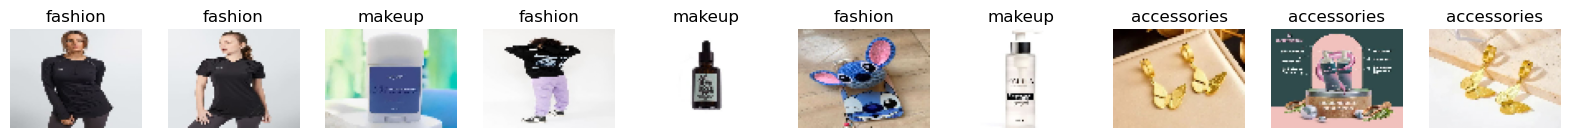

In [114]:
visualize_random_images_array(random_images, predicted_classes, image_size=(2, 2))

In [104]:
import pandas as pd
import os

# Define the path to the Excel file
excel_file_path = 'labels.xlsx'

# Load the Excel file containing the true labels
true_labels_df = pd.read_excel(excel_file_path, names=['Image Index', 'True Label'])

# Create a dictionary to map image index to true label
true_labels_map = dict(zip(true_labels_df['Image Index'], true_labels_df['True Label']))

# Calculate the number of correct predictions
num_correct_predictions = sum(predicted_class == true_labels_map[image_index] for image_index, predicted_class in enumerate(predicted_classes, start=1))

# Calculate accuracy
accuracy = num_correct_predictions / len(predicted_classes)

print(f'Accuracy: {accuracy:.2%}')

print("True Labels Map:", true_labels_map)

# Print out the values of image_index and predicted_class
for image_index, predicted_class in enumerate(predicted_classes, start=1):
    print("Image Index:", image_index)
    print("Predicted Class:", predicted_class)


Accuracy: 80.00%
True Labels Map: {1: 'fashion', 2: 'fashion', 3: 'makeup', 4: 'fashion', 5: 'makeup', 6: 'accessories', 7: 'makeup', 8: 'accessories', 9: 'makeup', 10: 'accessories'}
Image Index: 1
Predicted Class: fashion
Image Index: 2
Predicted Class: fashion
Image Index: 3
Predicted Class: makeup
Image Index: 4
Predicted Class: fashion
Image Index: 5
Predicted Class: makeup
Image Index: 6
Predicted Class: fashion
Image Index: 7
Predicted Class: makeup
Image Index: 8
Predicted Class: accessories
Image Index: 9
Predicted Class: accessories
Image Index: 10
Predicted Class: accessories
